In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import glob
dfiles = glob.glob("./data/sur/*.dat")
from tqdm import tqdm


In [ ]:
for dpath in tqdm(dfiles):
    sur_mat = np.zeros((256,256,4))
    
    df = pd.read_csv(dpath, skiprows=3, names=['col','row', 'p0', 'p1', 'c', 't'], sep=" ")
    sensor, second = dpath.split("/")[-1].split("_")[0:2]
    

    for i, row in df.iterrows():
        sur_mat[int(row['col']),int(row['row'])] = [row['p0'],row['p1'],row['c'],row['t']]

    max_tp_charge = 8000

    ## fit function ToT = f(q) = [p0 + p1*q - c/(q-t)]
    def make_sur(p0, p1, c, t):
        return lambda x : p0 + p1*x - c/(x-t)


    x = np.linspace(0, max_tp_charge, 1000)

    sur0 = make_sur(*sur_mat[0,0])
    y =  sur0(x)
    
    df2 = pd.read_csv("data/bin_map/EllipticIRRAD8.csv", skiprows=1, names=['col','row','bin'], sep=" ")

    bin_map = np.zeros((256,256), dtype=np.int)

    for i, row in df2.iterrows():
        bin_map[int(row['col']),int(row['row'])] = row['bin']
    
    badboysx = []
    badboysy = []
    suromap = []
    binsused = np.unique(bin_map)
    for bin_id in binsused:
        #bin_id=0
        xid, yid = np.where(bin_map == bin_id)
        ys = np.zeros((len(xid), len(x)))
        for i, pars in enumerate(sur_mat[xid,yid]):
            suro = make_sur(*pars)
            ys[i] = suro(x)
        suromap.append(ys)


    fig,axes = plt.subplots(2,2, figsize=(8,8))
    fig.suptitle(sensor+ " " +second, fontsize=16)
    ax = df['p1'].hist(ax=axes[0][0],bins=100)
    ax.set_yscale('log')
    ax.set_title("p1 distribution all pixels bins=100")

    ax = df['p0'].hist(ax=axes[0][1],bins=100)
    ax.set_yscale('log')
    ax.set_title("p0 distribution all pixels bins=100")

    ax = df['c'].hist(ax=axes[1][0],bins=100)
    ax.set_yscale('log')
    ax.set_title("c distribution all pixels bins=100")

    ax = df['t'].hist(ax=axes[1][1],bins=100)
    ax.set_yscale('log')
    ax.set_title("t distribution all pixels bins=100")
    fig.tight_layout()
    fig.savefig('{}_{}_surrogates.png'.format(sensor,second))

    bin_list = np.unique(bin_map)

    fig, axes = plt.subplots(len(binsused), figsize=(12, 18))
    for i,(b, ys) in enumerate(zip(binsused, suromap)):
        wrong = np.sum(np.any(ys[:,0:87]>60,axis=1))
        axes[i].set_title("Bin of {}, approx wrong/total: {}/{}".format(b, wrong, len(ys)))
        for y in ys:
            axes[i].plot(x,y, color='blue', alpha=0.01)
        axes[i].set_ylim([-0.01,30])
    fig.tight_layout()
    fig.savefig('{}_{}_surrogates.png'.format(sensor,second))

  0%|          | 0/15 [00:00<?, ?it/s]

In [82]:
y

array([ 6.86259154e+01,  7.38574736e+01,  8.00471829e+01,  8.74876707e+01,
        9.66042313e+01,  1.08039620e+02,  1.22813413e+02,  1.42645576e+02,
        1.70682571e+02,  2.13363070e+02,  2.86249186e+02,  4.39050802e+02,
        9.63106292e+02, -4.43097591e+03, -6.59831590e+02, -3.53041171e+02,
       -2.39348376e+02, -1.80069705e+02, -1.43673446e+02, -1.19046393e+02,
       -1.01269052e+02, -8.78284097e+01, -7.73067936e+01, -6.88437338e+01,
       -6.18867008e+01, -5.60646632e+01, -5.11192189e+01, -4.68648730e+01,
       -4.31650184e+01, -3.99168261e+01, -3.70414127e+01, -3.44772537e+01,
       -3.21756575e+01, -3.00975853e+01, -2.82113722e+01, -2.64910644e+01,
       -2.49151874e+01, -2.34658197e+01, -2.21278869e+01, -2.08886182e+01,
       -1.97371222e+01, -1.86640538e+01, -1.76613492e+01, -1.67220132e+01,
       -1.58399482e+01, -1.50098145e+01, -1.42269164e+01, -1.34871077e+01,
       -1.27867135e+01, -1.21224653e+01, -1.14914464e+01, -1.08910456e+01,
       -1.03189182e+01, -

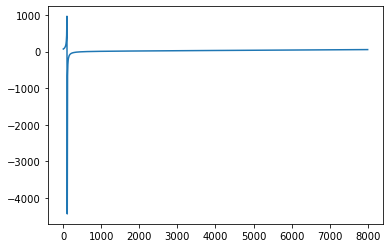

In [83]:
plt.plot(x,y)

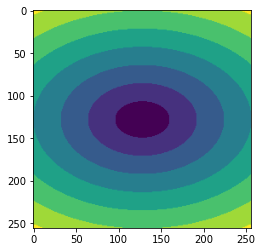

In [87]:
plt.imshow(bin_map)

In [89]:
ys = suromap[0]

In [90]:
bmap = bin_map.copy()
bmap[:,:] = 0
bmap[badboysx, badboysy] = 9

In [91]:
256**2 - len(badboysx)

6035

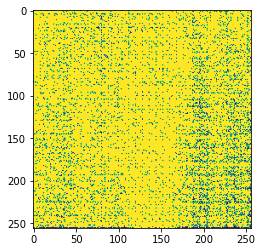

In [92]:
plt.imshow(bmap.T)

In [93]:
ys_max = np.max(ys, axis=0)
ys_min = np.max(ys, axis=0)
y_mid = np.mean(ys, axis=0)

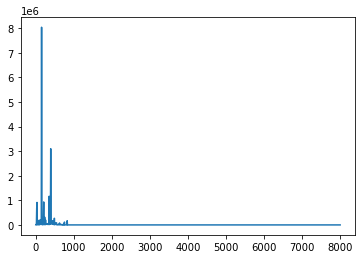

In [94]:
#plt.plot(x, ys_max)
#plt.plot(x, ys_min)
plt.plot(x, ys_max)

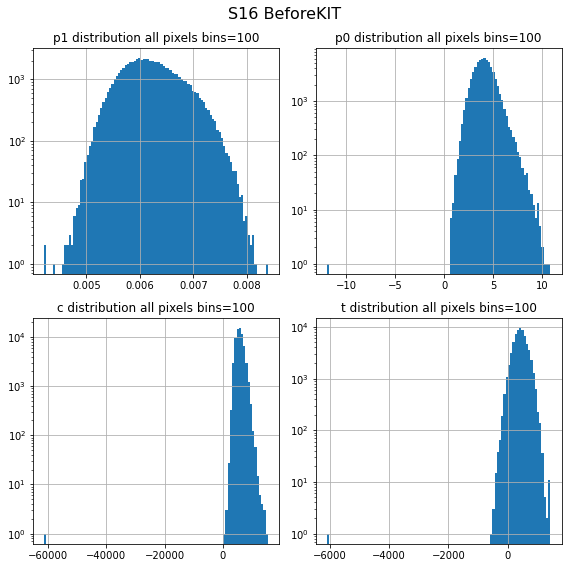